# Polynomial Logistic Regression Classifier

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


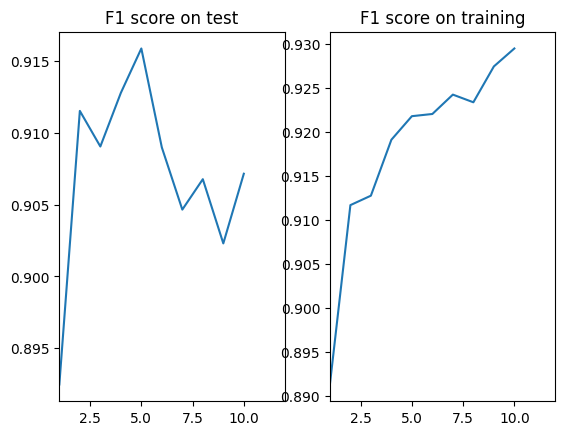

In [1]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

data = np.loadtxt('problem2data.txt')
X = data[:, 0:3]
y = data[:, 3:4].astype(int).reshape(-1)
n = len(y)  # total instance

degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
k = 5  # k fold
foldsize = int(n/5)
totalruns = 20
results = np.zeros((k, totalruns, len(degrees)))
train_res = np.zeros((k, totalruns, len(degrees)))
for repet in range(totalruns):
    print(repet)
    kf = KFold(n_splits=k)
    kf.get_n_splits(X)
    kfi = -1
    for train_index, test_index in kf.split(X):
        kfi += 1
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        for dei, degree in enumerate(degrees):
            poly = PolynomialFeatures(degree = degree, interaction_only=False, include_bias=False)
            X_train_poly = poly.fit_transform(X_train)
            X_test_poly = poly.transform(X_test)
            model = (LogisticRegression(penalty=None, max_iter=2000))
            model.fit(X_train_poly, y_train)
            results[kfi, repet, dei] = f1_score(y_test, model.predict(X_test_poly))
            train_res[kfi, repet, dei] = f1_score(y_train, model.predict(X_train_poly))

plt.subplot(1, 2, 1)            
plt.plot(degrees, np.mean(np.mean(results[:, :, :], axis = 1), axis=0))
plt.xlim([1,12])
#plt.ylim([.4, .9])
plt.title('F1 score on test')
plt.subplot(1, 2, 2)            
plt.plot(degrees, np.mean(np.mean(train_res[:, :, :], axis = 1), axis=0))
plt.xlim([1,12])
#plt.ylim([.4, .9])
plt.title('F1 score on training')
plt.show()